In [1]:
import pandas as pd

# Read CSV with additional options
df = pd.read_csv('UpdatedDataFile.csv',
                 encoding='utf-8',           # Handle special characters
                 sep=',',                    # Specify delimiter (comma is default)
                 header=0,                   # First row as column names
                 index_col=None,             # Don't use any column as index
                 na_values=['', 'NULL'],     # Treat these as NaN
                 skiprows=0,                 # Skip rows at the beginning
                 nrows=None)                 # Read all rows (or specify number)

# Basic data exploration
print(f"DataFrame loaded with {df.shape[0]} rows and {df.shape[1]} columns")
print("\nColumn information:")
print(df.info())

DataFrame loaded with 20197 rows and 9 columns

Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20197 entries, 0 to 20196
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PersonID        20197 non-null  int64  
 1   Start date      20197 non-null  object 
 2   End date        20197 non-null  object 
 3   M-Risk Factors  20197 non-null  object 
 4   Gender          20197 non-null  object 
 5   Age             20197 non-null  int64  
 6   MNA             20197 non-null  float64
 7   BMI             20197 non-null  float64
 8   Weight          20197 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.4+ MB
None


In [2]:
# Count records by PersonID
records_per_patient = df.groupby('PersonID').size().reset_index(name='Record_Count')

print("Number of records per patient:")
print(records_per_patient)

# Summary statistics
print(f"\nSummary (Record Statistics):")
print(f"Total patients: {len(records_per_patient)}")
print(f"Total records: {records_per_patient['Record_Count'].sum()}")
print(f"Average records per patient: {records_per_patient['Record_Count'].mean():.2f}")
print(f"Median per patient: {records_per_patient['Record_Count'].median():.2f}")
print(f"Min records per patient: {records_per_patient['Record_Count'].min()}")
print(f"Max records per patient: {records_per_patient['Record_Count'].max()}")

# Calculate percentiles
percentiles = records_per_patient['Record_Count'].quantile([0.25, 0.50, 0.75])
print(f"\nPercentiles:")
print(f"25th percentile (Q1): {percentiles[0.25]:.2f}")
print(f"50th percentile (Q2/Median): {percentiles[0.50]:.2f}")
print(f"75th percentile (Q3): {percentiles[0.75]:.2f}")

# Alternative: Using describe() for complete statistical summary
print(f"\nComplete Statistical Summary:")
print(records_per_patient['Record_Count'].describe())

# Additional insights
q1 = percentiles[0.25]
q3 = percentiles[0.75]
iqr = q3 - q1
print(f"\nAdditional Statistics:")
print(f"Interquartile Range (IQR): {iqr:.2f}")
print(f"25% of patients have ≤ {q1:.0f} records")
print(f"50% of patients have ≤ {percentiles[0.50]:.0f} records") 
print(f"75% of patients have ≤ {q3:.0f} records")

# Count patients in each quartile range
q1_count = len(records_per_patient[records_per_patient['Record_Count'] <= q1])
q2_count = len(records_per_patient[(records_per_patient['Record_Count'] > q1) & 
                                  (records_per_patient['Record_Count'] <= percentiles[0.50])])
q3_count = len(records_per_patient[(records_per_patient['Record_Count'] > percentiles[0.50]) & 
                                  (records_per_patient['Record_Count'] <= q3)])
q4_count = len(records_per_patient[records_per_patient['Record_Count'] > q3])

print(f"\nQuartile Distribution:")
print(f"Q1 (≤{q1:.0f} records): {q1_count} patients")
print(f"Q2 ({q1:.0f} < records ≤ {percentiles[0.50]:.0f}): {q2_count} patients")
print(f"Q3 ({percentiles[0.50]:.0f} < records ≤ {q3:.0f}): {q3_count} patients")
print(f"Q4 (>{q3:.0f} records): {q4_count} patients")


# Alternative: Just get the counts as a Series
record_counts = df['PersonID'].value_counts().sort_index()
print(f"\nAlternative view (sorted by PersonID):")
print(record_counts)

Number of records per patient:
     PersonID  Record_Count
0        2021           135
1        2907            94
2        2909            92
3        2937           141
4        2943           205
..        ...           ...
195     10031             3
196     10067            83
197     10078            68
198     10110            51
199     10113             3

[200 rows x 2 columns]

Summary (Record Statistics):
Total patients: 200
Total records: 20197
Average records per patient: 100.98
Median per patient: 93.00
Min records per patient: 3
Max records per patient: 227

Percentiles:
25th percentile (Q1): 84.50
50th percentile (Q2/Median): 93.00
75th percentile (Q3): 125.50

Complete Statistical Summary:
count    200.000000
mean     100.985000
std       50.197647
min        3.000000
25%       84.500000
50%       93.000000
75%      125.500000
max      227.000000
Name: Record_Count, dtype: float64

Additional Statistics:
Interquartile Range (IQR): 41.00
25% of patients have ≤ 84 recor

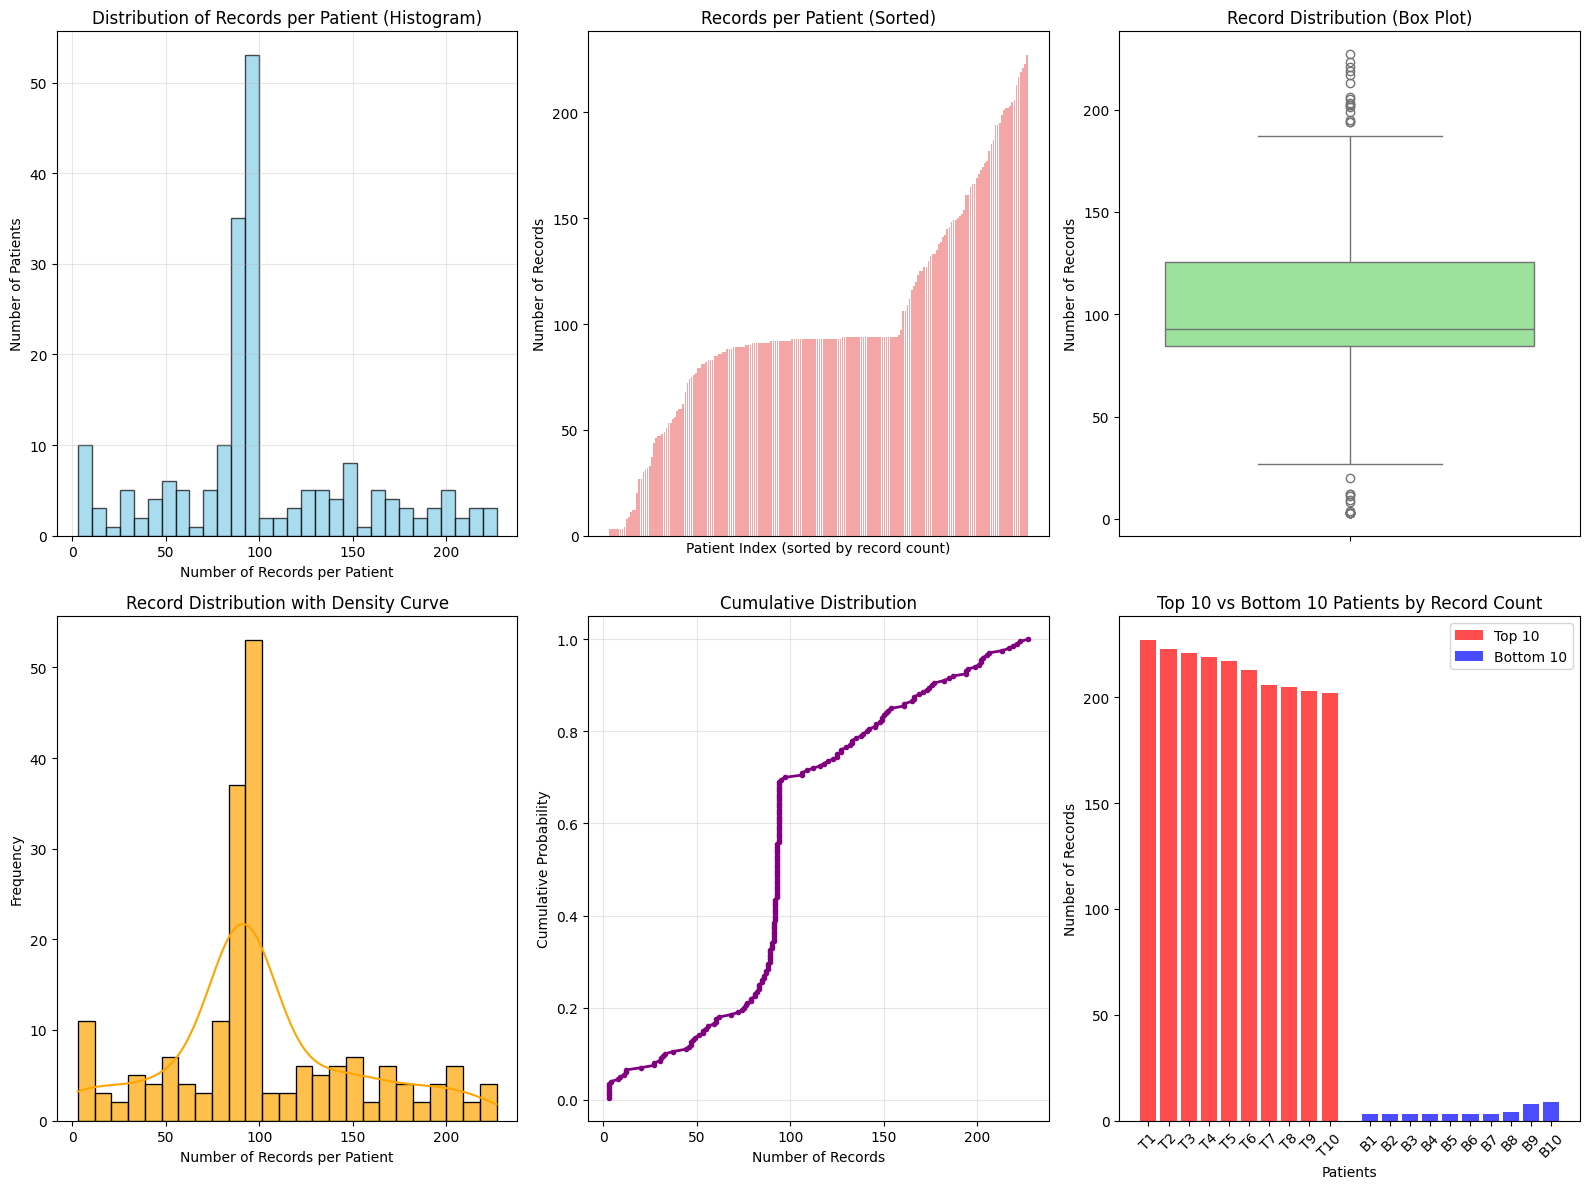

Record Distribution Analysis:

Record Count Frequencies:
Records | Patients
--------------------
      3 |        7
      4 |        1
      8 |        1
      9 |        1
     11 |        1
     12 |        2
     20 |        1
     27 |        2
     30 |        1
     31 |        1
     32 |        1
     33 |        1
     37 |        1
     44 |        1
     46 |        1
     47 |        2
     48 |        1
     49 |        1
     51 |        1
     53 |        2
... (showing top 20)

Patients with MOST records:
Patient 5593: 227 records
Patient 3667: 223 records
Patient 5724: 221 records
Patient 8038: 219 records
Patient 8041: 217 records

Patients with LEAST records:
Patient 9208: 3 records
Patient 9891: 3 records
Patient 9902: 3 records
Patient 9971: 3 records
Patient 9972: 3 records

Statistical Summary:
count    200.000000
mean     100.985000
std       50.197647
min        3.000000
25%       84.500000
50%       93.000000
75%      125.500000
max      227.000000
Name: Recor

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Count records by PersonID (assuming this is already done)
records_per_patient = df.groupby('PersonID').size().reset_index(name='Record_Count')

# Create multiple visualizations
plt.figure(figsize=(16, 12))

# 1. Histogram - Distribution of record counts
plt.subplot(2, 3, 1)
plt.hist(records_per_patient['Record_Count'], bins=30, color='skyblue', alpha=0.7, edgecolor='black')
plt.xlabel('Number of Records per Patient')
plt.ylabel('Number of Patients')
plt.title('Distribution of Records per Patient (Histogram)')
plt.grid(True, alpha=0.3)

# 2. Bar chart - Each patient's record count
plt.subplot(2, 3, 2)
# Sort by record count for better visualization
sorted_records = records_per_patient.sort_values('Record_Count')
plt.bar(range(len(sorted_records)), sorted_records['Record_Count'], color='lightcoral', alpha=0.7)
plt.xlabel('Patient Index (sorted by record count)')
plt.ylabel('Number of Records')
plt.title('Records per Patient (Sorted)')
plt.xticks([])  # Remove x-axis labels as there are too many patients

# 3. Box plot - Statistical distribution
plt.subplot(2, 3, 3)
sns.boxplot(y=records_per_patient['Record_Count'], color='lightgreen')
plt.ylabel('Number of Records')
plt.title('Record Distribution (Box Plot)')

# 4. Histogram with KDE
plt.subplot(2, 3, 4)
sns.histplot(records_per_patient['Record_Count'], bins=25, kde=True, color='orange', alpha=0.7)
plt.xlabel('Number of Records per Patient')
plt.ylabel('Frequency')
plt.title('Record Distribution with Density Curve')

# 5. Cumulative distribution
plt.subplot(2, 3, 5)
sorted_counts = np.sort(records_per_patient['Record_Count'])
cumulative = np.arange(1, len(sorted_counts) + 1) / len(sorted_counts)
plt.plot(sorted_counts, cumulative, marker='.', linestyle='-', color='purple', linewidth=2)
plt.xlabel('Number of Records')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution')
plt.grid(True, alpha=0.3)

# 6. Top/Bottom patients bar chart
plt.subplot(2, 3, 6)
# Show top 10 and bottom 10 patients
top_10 = records_per_patient.nlargest(10, 'Record_Count')
bottom_10 = records_per_patient.nsmallest(10, 'Record_Count')

x_pos = np.arange(len(top_10))
plt.bar(x_pos, top_10['Record_Count'], color='red', alpha=0.7, label='Top 10')
plt.bar(x_pos + len(top_10) + 1, bottom_10['Record_Count'], color='blue', alpha=0.7, label='Bottom 10')

plt.xlabel('Patients')
plt.ylabel('Number of Records')
plt.title('Top 10 vs Bottom 10 Patients by Record Count')
plt.xticks(list(x_pos) + [x + len(top_10) + 1 for x in x_pos], 
           [f'T{i+1}' for i in range(10)] + [f'B{i+1}' for i in range(10)], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# Additional detailed analysis
print("Record Distribution Analysis:")
print("=" * 50)

# Frequency of record counts
record_count_freq = records_per_patient['Record_Count'].value_counts().sort_index()
print("\nRecord Count Frequencies:")
print("Records | Patients")
print("-" * 20)
for records, patients in record_count_freq.head(20).items():
    print(f"{records:7d} | {patients:8d}")

if len(record_count_freq) > 20:
    print("... (showing top 20)")

# Show patients with most and least records
print(f"\nPatients with MOST records:")
top_patients = records_per_patient.nlargest(5, 'Record_Count')
for idx, row in top_patients.iterrows():
    print(f"Patient {row['PersonID']}: {row['Record_Count']} records")

print(f"\nPatients with LEAST records:")
bottom_patients = records_per_patient.nsmallest(5, 'Record_Count')
for idx, row in bottom_patients.iterrows():
    print(f"Patient {row['PersonID']}: {row['Record_Count']} records")

# Statistical summary
stats = records_per_patient['Record_Count'].describe()
print(f"\nStatistical Summary:")
print(stats)

In [4]:
# Count records by PersonID (assuming this is already done)
records_per_patient = df.groupby('PersonID').size().reset_index(name='Record_Count')

# Method 1: Filter patients with exactly 3 records
patients_with_3_records = records_per_patient[records_per_patient['Record_Count'] < 20]

print(f"Total patients with less than 20 records: {len(patients_with_3_records)}")
print("Patients with less than 20 records:")
print("=" * 40)
print(patients_with_3_records)

Total patients with less than 20 records: 13
Patients with less than 20 records:
     PersonID  Record_Count
149      9208             3
152      9224            11
153      9241            12
164      9446             9
173      9708            12
181      9891             3
184      9902             3
186      9908             8
189      9971             3
190      9972             3
194     10008             4
195     10031             3
199     10113             3


In [5]:
# Convert date columns to datetime first
df['Start date'] = pd.to_datetime(df['Start date'], format='%d/%m/%Y')
df['End date'] = pd.to_datetime(df['End date'], format='%d/%m/%Y')

# Get detailed info for each patient
patient_summary = df.groupby('PersonID').agg({
    'PersonID': 'count',  # Count of records
    'Start date': ['min', 'max'],  # Date range
    'Gender': 'first',  # Gender (assuming consistent per patient)
    'Age': 'first'  # Age (assuming consistent per patient)
}).round(2)

# Flatten column names
patient_summary.columns = ['Record_Count', 'First_Date', 'Last_Date', 'Gender', 'Age']

# Reorder columns to put Days_Duration next to Last_Date
patient_summary = patient_summary[['Record_Count', 'First_Date', 'Last_Date', 'Gender', 'Age']]

print("Patient Summary:")
print(patient_summary)



Patient Summary:
          Record_Count First_Date  Last_Date  Gender  Age
PersonID                                                 
2021               135 2019-09-12 2020-10-18  Female  103
2907                94 2019-09-01 2020-06-06  Female   98
2909                92 2019-08-28 2020-05-27  Female   99
2937               141 2019-08-28 2020-10-21  Female   72
2943               205 2019-02-04 2020-10-08  Female   85
...                ...        ...        ...     ...  ...
10031                3 2020-08-20 2020-08-26  Female   94
10067               83 2020-02-10 2020-10-13  Female   84
10078               68 2020-04-10 2020-10-28  Female   80
10110               51 2020-06-10 2020-11-07    Male   71
10113                3 2020-09-23 2020-09-29    Male   71

[200 rows x 5 columns]


In [6]:
# Unique patients
unique_patients = df.drop_duplicates(subset=['PersonID'])

# Count male and female patients
gender_counts = unique_patients['Gender'].value_counts()
print("Gender Distribution:")
print(gender_counts)
print(f"Total patients: {len(unique_patients)}")

# Calculate age statistics
age_stats = {
    'Average Age': unique_patients['Age'].mean(),
    'Maximum Age': unique_patients['Age'].max(),
    'Minimum Age': unique_patients['Age'].min(),
    'Median Age': unique_patients['Age'].median(),
    'Standard Deviation': unique_patients['Age'].std()
}

print(f"\nAge Statistics:")
for stat, value in age_stats.items():
    if stat == 'Standard Deviation':
        print(f"{stat}: {value:.2f}")
    else:
        print(f"{stat}: {value:.1f}")

# More detailed breakdown by gender
print(f"\nAge Statistics by Gender:")
age_by_gender = unique_patients.groupby('Gender')['Age'].agg(['count', 'mean', 'min', 'max', 'median']).round(1)
age_by_gender.columns = ['Count', 'Mean_Age', 'Min_Age', 'Max_Age', 'Median_Age']
print(age_by_gender)

# Additional summary
print(f"\nSummary:")
print(f"Female patients: {gender_counts.get('Female', 0)} ({gender_counts.get('Female', 0)/len(unique_patients)*100:.1f}%)")
print(f"Male patients: {gender_counts.get('Male', 0)} ({gender_counts.get('Male', 0)/len(unique_patients)*100:.1f}%)")

Gender Distribution:
Gender
Female    100
Male      100
Name: count, dtype: int64
Total patients: 200

Age Statistics:
Average Age: 86.0
Maximum Age: 112.0
Minimum Age: 62.0
Median Age: 87.0
Standard Deviation: 9.21

Age Statistics by Gender:
        Count  Mean_Age  Min_Age  Max_Age  Median_Age
Gender                                               
Female    100      88.1       70      108        88.0
Male      100      83.9       62      112        85.0

Summary:
Female patients: 100 (50.0%)
Male patients: 100 (50.0%)


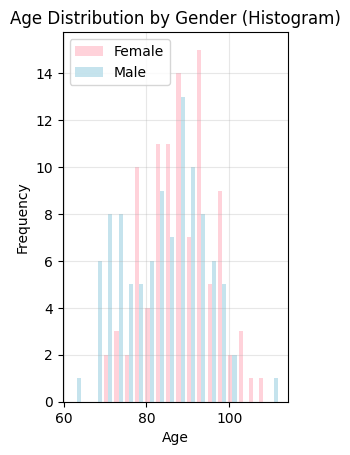

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
# Method 1: Side-by-side histograms
plt.subplot(1, 2, 1)
plt.hist([unique_patients[unique_patients['Gender'] == 'Female']['Age'], 
          unique_patients[unique_patients['Gender'] == 'Male']['Age']], 
         bins=20, alpha=0.7, label=['Female', 'Male'], color=['pink', 'lightblue'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Gender (Histogram)')
plt.legend()
plt.grid(True, alpha=0.3)


/var/folders/np/_nccp4gd1ygg4bq0gpkdms1h0000gn/T/ipykernel_64593/2160786481.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=unique_patients, x='Gender', y='Age', palette=['pink', 'lightblue'])


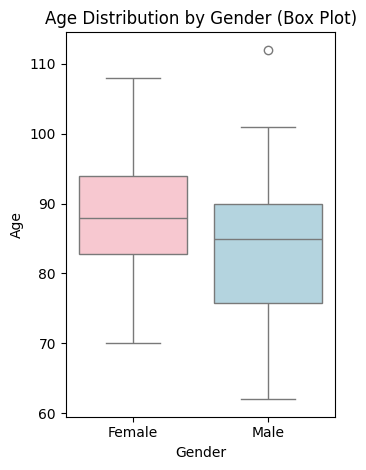

Age Distribution Summary by Gender:
        count   mean       std   min    25%   50%   75%    max
Gender                                                        
Female  100.0  88.13  8.140999  70.0  82.75  88.0  94.0  108.0
Male    100.0  83.87  9.741772  62.0  75.75  85.0  90.0  112.0


In [8]:
# Method 2: Box plot
plt.subplot(1, 2, 2)
sns.boxplot(data=unique_patients, x='Gender', y='Age', palette=['pink', 'lightblue'])
plt.title('Age Distribution by Gender (Box Plot)')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

# Additional detailed analysis
print("Age Distribution Summary by Gender:")
age_summary = unique_patients.groupby('Gender')['Age'].describe()
print(age_summary)